In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
#read csv file
df = pd.read_csv('C:/Users/sigma/Desktop/manual_denchmark.csv')
df

,User/Project,Bug/Issue ID,Summary,Commit ID,DL Bugs,DL Bug Type,Non DL bugs,Extrinsic Bug,Intrinsic Bug
0,apache+incubator-mxnet,10011,[CMake][IoT][Jetson] Building with CMake produ...,85215b6176ef3612d198f590268a6595b86565fb,Yes,4.0,No,Yes,No
1,apache+incubator-mxnet,10026,MXNET_MKLDNN_DEBUG=1 produces errors,525ead9caaf49035b0310ef7c8b686b393463760,No,NaN,Yes,Yes,No
2,apache+incubator-mxnet,10146,why the gluon.nn.embedding always return float...,0bcc2daace816c98f1048792dc0350cebb38b45f,No,NaN,Yes,No,Yes
3,apache+incubator-mxnet,10235,Build fails with USE_CUDNN = 0,11deb676bec595f05d3469a5b33724afd77e13e6,Yes,5.0,No,Yes,No
4,apache+incubator-mxnet,10431,Elementwise multiplication of two ndarrays ret...,8b172d7fff080f8d3aa3596779a1e09e602fbe08,No,NaN,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...
258,3flow+tfjs,4481,Use tfjs 2.8.2 executeAsync show 'length' unde...,e249b6d7c62ea34cbb0a6c6a498bf1935a97ee3c,Yes,4.0,No,No,Yes
259,3flow+tfjs,665,Bizarre bug with tf.argMax,9e1d279246773adc79024649168a13179c16a22d,Yes,3.0,No,No,Yes
260,3flow+tfjs,673,Setting trainable property of layers doesn't w...,8c564b8f2bd52d468a955b8fbb5b22e399243da5,Yes,1.0,No,No,Yes
261,3flow+tfjs,744,The tf.load1() does not works for 3flow keras 1s,ee4416863473fc951681a37dbccd207347b79db9,Yes,4.0,No,No,Yes


In [79]:
#print the column names of the dataframe
df.columns

Index(['User/Project', 'Bug/Issue ID', 'Summary', 'Commit ID', 'DL Bugs ',
       'DL Bug Type', 'Non DL bugs', 'Extrinsic Bug', 'Intrinsic Bug'],
      dtype='object')

In [80]:
df['DL Bugs '] = df['DL Bugs '].str.strip()
df['Non DL bugs'] = df['Non DL bugs'].str.strip()
df['Extrinsic Bug'] = df['Extrinsic Bug'].str.strip()
df['Intrinsic Bug'] = df['Intrinsic Bug'].str.strip()

In [81]:
#replace the missing value or nan value with 0
df = df.fillna(420)
df

,User/Project,Bug/Issue ID,Summary,Commit ID,DL Bugs,DL Bug Type,Non DL bugs,Extrinsic Bug,Intrinsic Bug
0,apache+incubator-mxnet,10011,[CMake][IoT][Jetson] Building with CMake produ...,85215b6176ef3612d198f590268a6595b86565fb,Yes,4.0,No,Yes,No
1,apache+incubator-mxnet,10026,MXNET_MKLDNN_DEBUG=1 produces errors,525ead9caaf49035b0310ef7c8b686b393463760,No,420.0,Yes,Yes,No
2,apache+incubator-mxnet,10146,why the gluon.nn.embedding always return float...,0bcc2daace816c98f1048792dc0350cebb38b45f,No,420.0,Yes,No,Yes
3,apache+incubator-mxnet,10235,Build fails with USE_CUDNN = 0,11deb676bec595f05d3469a5b33724afd77e13e6,Yes,5.0,No,Yes,No
4,apache+incubator-mxnet,10431,Elementwise multiplication of two ndarrays ret...,8b172d7fff080f8d3aa3596779a1e09e602fbe08,No,420.0,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...
258,3flow+tfjs,4481,Use tfjs 2.8.2 executeAsync show 'length' unde...,e249b6d7c62ea34cbb0a6c6a498bf1935a97ee3c,Yes,4.0,No,No,Yes
259,3flow+tfjs,665,Bizarre bug with tf.argMax,9e1d279246773adc79024649168a13179c16a22d,Yes,3.0,No,No,Yes
260,3flow+tfjs,673,Setting trainable property of layers doesn't w...,8c564b8f2bd52d468a955b8fbb5b22e399243da5,Yes,1.0,No,No,Yes
261,3flow+tfjs,744,The tf.load1() does not works for 3flow keras 1s,ee4416863473fc951681a37dbccd207347b79db9,Yes,4.0,No,No,Yes


In [82]:
#print the column names of the dataframe
df.columns

Index(['User/Project', 'Bug/Issue ID', 'Summary', 'Commit ID', 'DL Bugs ',
       'DL Bug Type', 'Non DL bugs', 'Extrinsic Bug', 'Intrinsic Bug'],
      dtype='object')

In [83]:
#change the name of few columns
df = df.rename(columns={'DL Bugs ':'DL_Bugs','Non DL bugs':'Non_DL_Bugs', 'Extrinsic Bugs':'Extrinsic_Bugs', 'Intrinsic Bugs':'Intrinsic_Bugs'})
df

,User/Project,Bug/Issue ID,Summary,Commit ID,DL_Bugs,DL Bug Type,Non_DL_Bugs,Extrinsic Bug,Intrinsic Bug
0,apache+incubator-mxnet,10011,[CMake][IoT][Jetson] Building with CMake produ...,85215b6176ef3612d198f590268a6595b86565fb,Yes,4.0,No,Yes,No
1,apache+incubator-mxnet,10026,MXNET_MKLDNN_DEBUG=1 produces errors,525ead9caaf49035b0310ef7c8b686b393463760,No,420.0,Yes,Yes,No
2,apache+incubator-mxnet,10146,why the gluon.nn.embedding always return float...,0bcc2daace816c98f1048792dc0350cebb38b45f,No,420.0,Yes,No,Yes
3,apache+incubator-mxnet,10235,Build fails with USE_CUDNN = 0,11deb676bec595f05d3469a5b33724afd77e13e6,Yes,5.0,No,Yes,No
4,apache+incubator-mxnet,10431,Elementwise multiplication of two ndarrays ret...,8b172d7fff080f8d3aa3596779a1e09e602fbe08,No,420.0,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...
258,3flow+tfjs,4481,Use tfjs 2.8.2 executeAsync show 'length' unde...,e249b6d7c62ea34cbb0a6c6a498bf1935a97ee3c,Yes,4.0,No,No,Yes
259,3flow+tfjs,665,Bizarre bug with tf.argMax,9e1d279246773adc79024649168a13179c16a22d,Yes,3.0,No,No,Yes
260,3flow+tfjs,673,Setting trainable property of layers doesn't w...,8c564b8f2bd52d468a955b8fbb5b22e399243da5,Yes,1.0,No,No,Yes
261,3flow+tfjs,744,The tf.load1() does not works for 3flow keras 1s,ee4416863473fc951681a37dbccd207347b79db9,Yes,4.0,No,No,Yes


In [84]:
df.columns

Index(['User/Project', 'Bug/Issue ID', 'Summary', 'Commit ID', 'DL_Bugs',
       'DL Bug Type', 'Non_DL_Bugs', 'Extrinsic Bug', 'Intrinsic Bug'],
      dtype='object')

In [85]:
#count the number of rows and columns
df.shape

(263, 9)

In [86]:
df['Non_DL_Bugs'].value_counts()

No     172
Yes     91
Name: Non_DL_Bugs, dtype: int64

In [87]:
df['Intrinsic Bug'].value_counts()

Yes    160
No     103
Name: Intrinsic Bug, dtype: int64

In [88]:
df['DL_Bugs'].value_counts()

Yes    171
No      92
Name: DL_Bugs, dtype: int64

In [89]:
df['Extrinsic Bug'].value_counts()

No     160
Yes    103
Name: Extrinsic Bug, dtype: int64

In [90]:
#count the number of rows
total_bug= df.count() - 1

In [91]:
#create a list
list_label= ['DL_Bugs','Non_DL_Bugs','Extrinsic_Bugs','Intrinsic_Bugs']

In [92]:
#create a list for the count of the string values 'Yes' & 'No' in the columns
list_label_count = [df['Non_DL_Bugs'].value_counts()['No'],df['Non_DL_Bugs'].value_counts()['Yes'],df['Intrinsic Bug'].value_counts()['No'],df['Intrinsic Bug'].value_counts()['Yes']]

In [93]:
list_label_count

[172, 91, 103, 160]

In [94]:
#get the ratio of DL_Bugs and Non_DL_Bugs
DL_Bugs_ratio = df['Non_DL_Bugs'].value_counts()['No']/total_bug['Non_DL_Bugs']
Non_DL_Bugs_ratio = df['Non_DL_Bugs'].value_counts()['Yes']/total_bug['Non_DL_Bugs']
Extrinsic_Bugs_ratio = df['Intrinsic Bug'].value_counts()['No']/total_bug['Intrinsic Bug']
Intrinsic_Bugs_ratio = df['Intrinsic Bug'].value_counts()['Yes']/total_bug['Intrinsic Bug']

In [95]:
#list of the ratio
list_ratio = [DL_Bugs_ratio,Non_DL_Bugs_ratio,Extrinsic_Bugs_ratio,Intrinsic_Bugs_ratio]

In [96]:
list_ratio

[0.6564885496183206,
 0.3473282442748092,
 0.3931297709923664,
 0.6106870229007634]

In [97]:
# nothing = 0, model = 1, training = 2, tensor & input = 3, API = 4, GPU = 5
#unique values in the column
df['DL Bug Type'].unique()

array([  4., 420.,   5.,   1.,   2.,   3.])

In [98]:
df['DL Bug Type'].unique()

array([  4., 420.,   5.,   1.,   2.,   3.])

In [99]:
#get count of the unique values in the column
df['DL Bug Type'].value_counts()

420.0    92
2.0      75
4.0      34
1.0      29
3.0      19
5.0      14
Name: DL Bug Type, dtype: int64

In [100]:
#list of the names of the unique values in the column
list_dl_bug_type_label = ['NDL Bug','Model','Training','Tensor & Input','API','GPU']

In [101]:
#create a list for the count of the string values 'Yes' & 'No' in the columns
list_dl_bug_type = [df['DL Bug Type'].value_counts()[420.0],df['DL Bug Type'].value_counts()[1.0],df['DL Bug Type'].value_counts()[2.0],df['DL Bug Type'].value_counts()[3.0],df['DL Bug Type'].value_counts()[4.0],df['DL Bug Type'].value_counts()[5.0]]

In [102]:
list_dl_bug_type

[92, 29, 75, 19, 34, 14]

In [103]:
total_bug['DL Bug Type']

262

In [104]:
#get the ratio of dl_bug_type
Non_DL_Bug_ratio = df['DL Bug Type'].value_counts()[420.0]/total_bug['DL Bug Type']
Model_ratio = df['DL Bug Type'].value_counts()[1.0]/total_bug['DL Bug Type']
Training_ratio = df['DL Bug Type'].value_counts()[2.0]/total_bug['DL Bug Type']
Tensor_Input_ratio = df['DL Bug Type'].value_counts()[3.0]/total_bug['DL Bug Type']
API_ratio = df['DL Bug Type'].value_counts()[4.0]/total_bug['DL Bug Type']
GPU_ratio = df['DL Bug Type'].value_counts()[5.0]/total_bug['DL Bug Type']

In [105]:
list_dl_bug_type_ratio = [Non_DL_Bug_ratio,Model_ratio,Training_ratio,Tensor_Input_ratio,API_ratio,GPU_ratio]

In [106]:
#percentage of the ratio
list_dl_bug_type_ratio = [i * 100 for i in list_dl_bug_type_ratio]

In [107]:
list_dl_bug_type_ratio

[35.11450381679389,
 11.068702290076336,
 28.62595419847328,
 7.251908396946565,
 12.977099236641221,
 5.343511450381679]

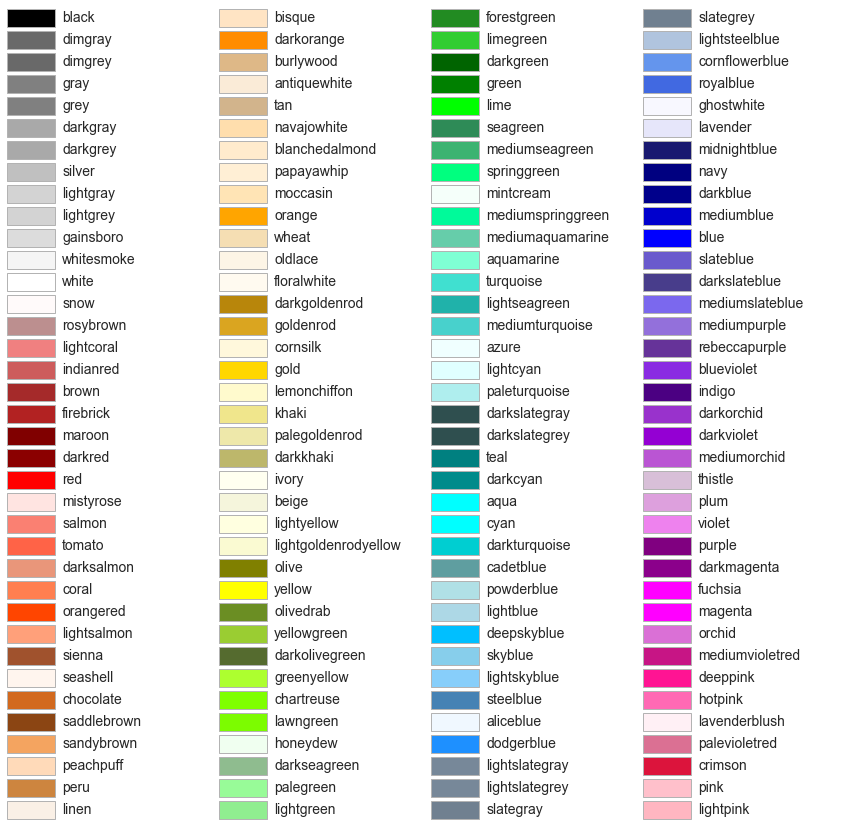

In [115]:
import math

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig


plot_colortable(mcolors.CSS4_COLORS)
plt.show()

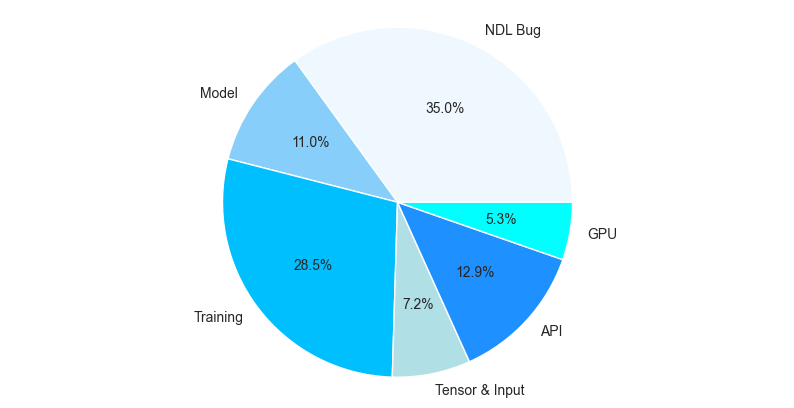

In [116]:
#visualize the data with the help of pie chart with customization of color and grid of the graph with clear font size
plt.figure(figsize=(10,5))
plt.pie(list_dl_bug_type,labels=list_dl_bug_type_label,autopct='%1.1f%%',colors=['aliceblue','lightskyblue','deepskyblue','powderblue','dodgerblue','aqua'])
plt.axis('equal')
plt.grid()
plt.show()

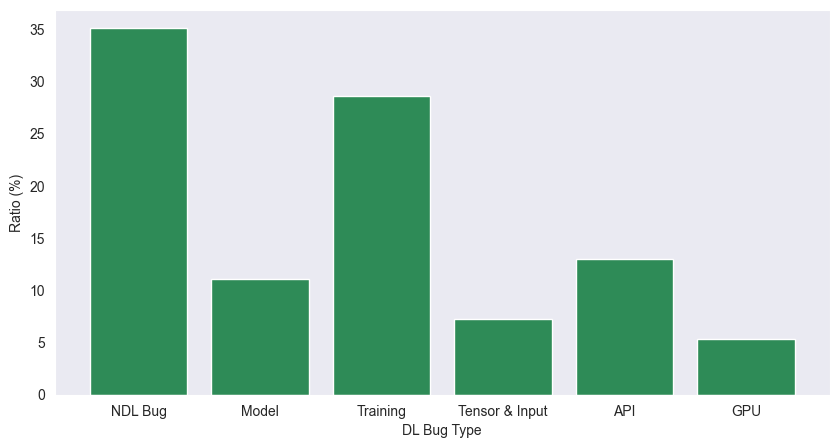

In [113]:
#visulize the data with the help of grid bar graph with customization of color and grid of the graph
plt.figure(figsize=(10,5))
plt.bar(list_dl_bug_type_label,list_dl_bug_type_ratio,color='seagreen')
plt.xlabel('DL Bug Type')
plt.ylabel('Ratio (%)')
plt.grid()
plt.show()

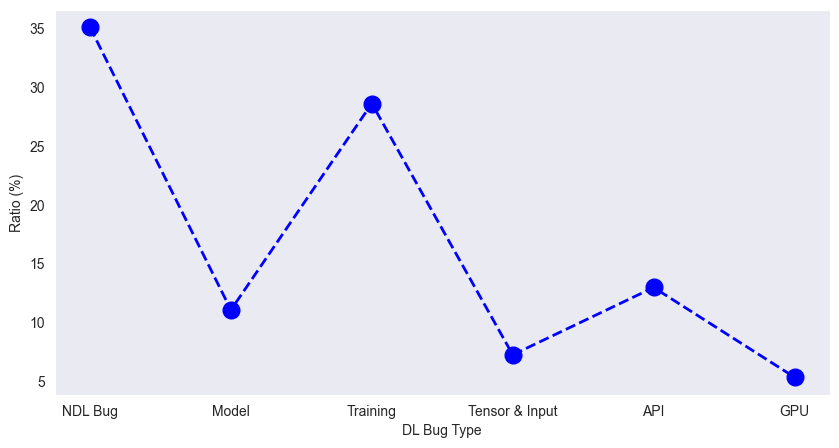

In [38]:
#visualize using line graph with customization of the graph
plt.figure(figsize=(10,5))
plt.plot(list_dl_bug_type_label,list_dl_bug_type_ratio,color='blue',marker='o',linestyle='dashed',linewidth=2,markersize=12)
plt.xlabel('DL Bug Type')
plt.ylabel('Ratio (%)')
plt.grid()
plt.show()

In [39]:
# #correlation of Non_DL_Bugs value 'Yes' with Extrinsic Bug 'Yes' from the dataframe
# df[(df['Non_DL_Bugs']=='Yes') & (df['Extrinsic Bug']=='Yes')].count()
# df[(df['Non_DL_Bugs']=='No') & (df['Extrinsic Bug']=='Yes')].count()
# df[(df['Non_DL_Bugs']=='No') & (df['Extrinsic Bug']=='No')].count()
# df[(df['Non_DL_Bugs']=='Yes') & (df['Extrinsic Bug']=='No')].count()

In [40]:
#copy the dataframe
df2 = df.copy()

In [41]:
#replace the yes to 1 and no to 0 for non_dl_bugs and extrinsic_bug columns
df2['Non_DL_Bugs'] = df2['Non_DL_Bugs'].replace({'Yes':1,'No':0})
df2['Extrinsic Bug'] = df2['Extrinsic Bug'].replace({'Yes':1,'No':0})
df2['DL_Bugs'] = df2['DL_Bugs'].replace({'Yes':1,'No':0})
df2['Intrinsic Bug'] = df2['Intrinsic Bug'].replace({'Yes':1,'No':0})

In [42]:
#correlation of Non_DL_Bugs and Extrinsic Bug columns from the dataframe
df2[['Non_DL_Bugs','Extrinsic Bug']].corr()

,Non_DL_Bugs,Extrinsic Bug
Non_DL_Bugs,1.000000,0.120543
Extrinsic Bug,0.120543,1.000000


In [43]:
#correlation of DL_Bugs and Extrinsic Bug columns from the dataframe
df2[['DL_Bugs','Extrinsic Bug']].corr()

,DL_Bugs,Extrinsic Bug
DL_Bugs,1.000000,-0.130173
Extrinsic Bug,-0.130173,1.000000


In [44]:
# correlation of DL bugs, non dl bugs, intrinsic bugs and extrinsic bugs
df2[['DL_Bugs','Non_DL_Bugs','Extrinsic Bug', 'Intrinsic Bug']].corr()

,DL_Bugs,Non_DL_Bugs,Extrinsic Bug,Intrinsic Bug
DL_Bugs,1.000000,-0.991655,-0.130173,0.130173
Non_DL_Bugs,-0.991655,1.000000,0.120543,-0.120543
Extrinsic Bug,-0.130173,0.120543,1.000000,-1.000000
Intrinsic Bug,0.130173,-0.120543,-1.000000,1.000000


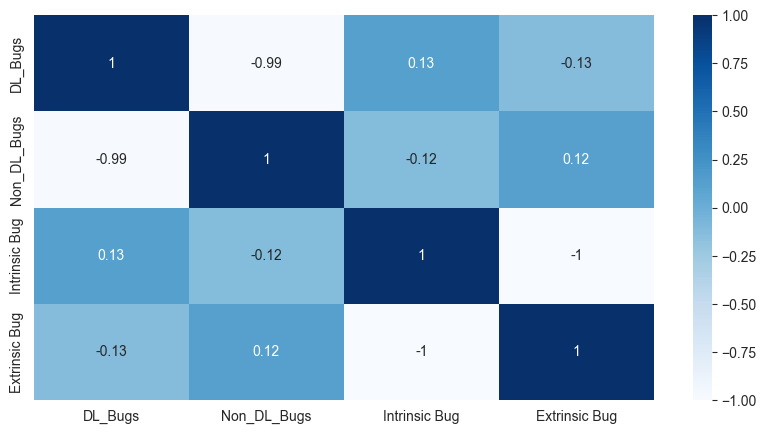

In [45]:
#visualize the correlation of DL bugs, non dl bugs, intrinsic bugs and extrinsic bugs
plt.figure(figsize=(10,5))
sns.heatmap(df2[['DL_Bugs','Non_DL_Bugs','Intrinsic Bug','Extrinsic Bug']].corr(),annot=True, cmap='Blues')
plt.show()

In [46]:
# create a list of DL_bug_type
Bug_Type = ['Model & Intrinsic', 'Model & Extrinsic', 'Training & Intrinsic', 'Training & Extrinsic', ' Tensor & Intrinsic', 'Tensor & Extrinsic', 'API & Intrinsic', 'API & Extrinsic', 'GPU & Intrinsic', 'GPU & Extrinsic', 'NDL & Intrinsic', 'NDL & Extrinsic']

In [47]:
#prinnt the ratio of each unique values from DL_bug_type column with extrinsic bug column
Model_Extrinsic = (df2[(df2['DL Bug Type']==1.0) & (df2['Extrinsic Bug']==1.0)].count())/df2[(df2['DL Bug Type']==1.0)].count()
Model_Intrinsic = (df2[(df2['DL Bug Type']==1.0) & (df2['Intrinsic Bug']==1.0)].count())/df2[(df2['DL Bug Type']==1.0)].count()
Training_Extrinsic = (df2[(df2['DL Bug Type']==2.0) & (df2['Extrinsic Bug']==1.0)].count())/df2[(df2['DL Bug Type']==2.0)].count()
Training_Intrinsic = (df2[(df2['DL Bug Type']==2.0) & (df2['Intrinsic Bug']==1.0)].count())/df2[(df2['DL Bug Type']==2.0)].count()
Tensor_Extrinsic = (df2[(df2['DL Bug Type']==3.0) & (df2['Extrinsic Bug']==1.0)].count())/df2[(df2['DL Bug Type']==3.0)].count()
Tensor_Intrinsic =  (df2[(df2['DL Bug Type']==3.0) & (df2['Intrinsic Bug']==1.0)].count())/df2[(df2['DL Bug Type']==3.0)].count()
API_Extrinsic =  (df2[(df2['DL Bug Type']==4.0) & (df2['Extrinsic Bug']==1.0)].count())/df2[(df2['DL Bug Type']==4.0)].count()
API_Intrinsic = (df2[(df2['DL Bug Type']==4.0) & (df2['Intrinsic Bug']==1.0)].count())/df2[(df2['DL Bug Type']==4.0)].count()
GPU_Extrinsic = (df2[(df2['DL Bug Type']==5.0) & (df2['Extrinsic Bug']==1.0)].count())/df2[(df2['DL Bug Type']==5.0)].count()
GPU_Intrinsic = (df2[(df2['DL Bug Type']==5.0) & (df2['Intrinsic Bug']==1.0)].count())/df2[(df2['DL Bug Type']==5.0)].count()
NDL_Extrinsic = (df2[(df2['DL Bug Type']==420.0) & (df2['Extrinsic Bug']==1.0)].count())/df2[(df2['DL Bug Type']==420.0)].count()
NDL_Intrinsic = (df2[(df2['DL Bug Type']==420.0) & (df2['Intrinsic Bug']==1.0)].count())/df2[(df2['DL Bug Type']==420.0)].count()

In [48]:
#save all the values in a list
Ratio_Extrinsic_Intrinsic_Bug_Type = [Model_Intrinsic[0], Model_Extrinsic[0], Training_Intrinsic[0], Training_Extrinsic[0], Tensor_Intrinsic[0], Tensor_Extrinsic[0], API_Intrinsic[0], API_Extrinsic[0], GPU_Intrinsic[0], GPU_Extrinsic[0], NDL_Intrinsic[0], NDL_Extrinsic[0]]

In [49]:
#make ratio_extrinsic_intrinsic_bug_type as percentage
Ratio_Extrinsic_Intrinsic_Bug_Type = [i*100 for i in Ratio_Extrinsic_Intrinsic_Bug_Type]
Ratio_Extrinsic_Intrinsic_Bug_Type

[62.06896551724138,
 37.93103448275862,
 73.33333333333333,
 26.666666666666668,
 63.1578947368421,
 36.84210526315789,
 79.41176470588235,
 20.588235294117645,
 0.0,
 100.0,
 52.17391304347826,
 47.82608695652174]

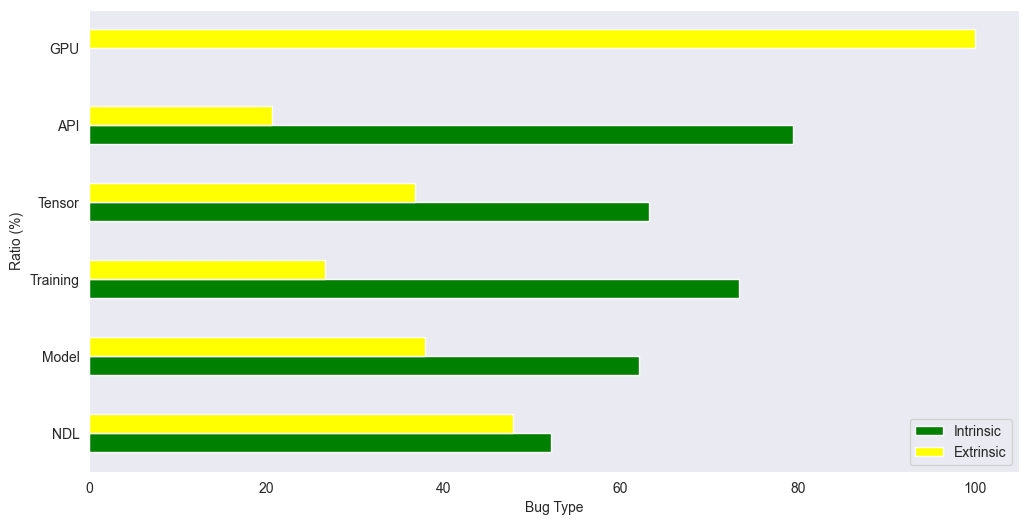

In [50]:
plotdata = pd.DataFrame({
    "Intrinsic":[NDL_Intrinsic[0]*100, Model_Intrinsic[0]*100, Training_Intrinsic[0]*100, Tensor_Intrinsic[0]*100, API_Intrinsic[0]*100, GPU_Intrinsic[0]*100],
    "Extrinsic":[NDL_Extrinsic[0]*100, Model_Extrinsic[0]*100, Training_Extrinsic[0]*100, Tensor_Extrinsic[0]*100, API_Extrinsic[0]*100, GPU_Extrinsic[0]*100]},
    index=["NDL", "Model", "Training", "Tensor", "API", "GPU"])

plotdata.plot(kind="barh",figsize=(12, 6), color= ['green', 'yellow'])
plt.xlabel("Bug Type")
plt.ylabel("Ratio (%)")
plt.grid()
plt.show()

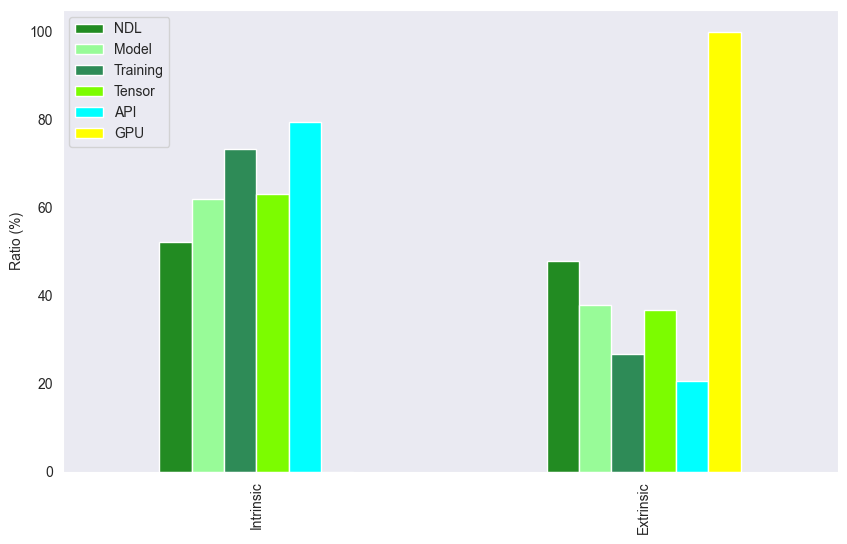

In [51]:
plotdata = pd.DataFrame({
    "NDL":[NDL_Intrinsic[0]*100, NDL_Extrinsic[0]*100],
    "Model":[Model_Intrinsic[0]*100, Model_Extrinsic[0]*100],
    "Training":[Training_Intrinsic[0]*100, Training_Extrinsic[0]*100],
    "Tensor":[Tensor_Intrinsic[0]*100, Tensor_Extrinsic[0]*100],
    "API":[API_Intrinsic[0]*100, API_Extrinsic[0]*100],
    "GPU":[GPU_Intrinsic[0]*100, GPU_Extrinsic[0]*100]},
    index=["Intrinsic", "Extrinsic"])

plotdata.plot(kind="bar",figsize=(10, 6), color= ['forestgreen', 'palegreen', 'seagreen', 'lawngreen', 'cyan', 'yellow'])
plt.ylabel("Ratio (%)")
plt.grid()
plt.show()

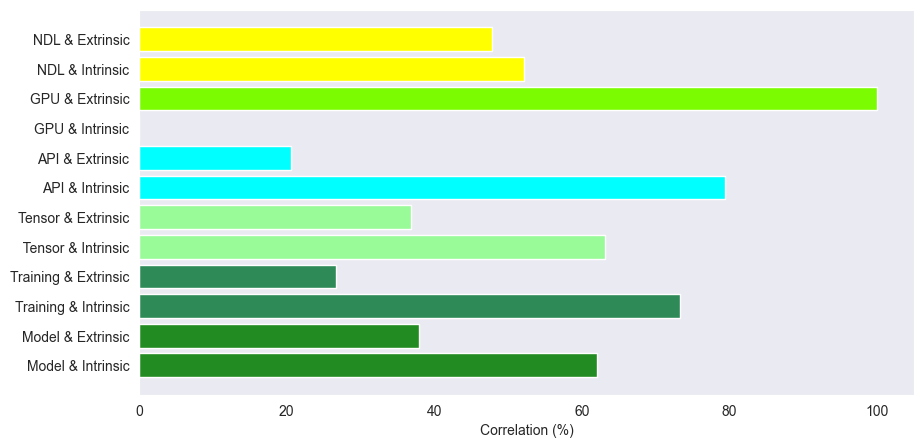

<Figure size 640x480 with 0 Axes>

In [52]:
#customization of the graph horizontal bar graph
plt.figure(figsize=(10,5))
plt.barh(Bug_Type,Ratio_Extrinsic_Intrinsic_Bug_Type,color=['forestgreen', 'forestgreen', 'seagreen', 'seagreen', 'palegreen', 'palegreen','cyan', 'cyan', 'lawngreen', 'lawngreen', 'yellow', 'yellow'])
plt.xlabel('Correlation (%)')
plt.grid()
plt.show()
#save the graph as png and download with high resolution
plt.savefig('Correlation_Extrinsic_Intrinsic_Bug_Type.png', dpi=300, bbox_inches='tight')

In [53]:
Ratio_Extrinsic_Bug_Type = [Model_Extrinsic[0], Training_Extrinsic[0], Tensor_Extrinsic[0], API_Extrinsic[0], GPU_Extrinsic[0], NDL_Extrinsic[0]]
Ratio_Extrinsic_Bug_Type = [i*100 for i in Ratio_Extrinsic_Bug_Type]
Bug_Type_Extrinsic = ['Model', 'Training', 'Tensor', 'API', 'GPU', 'NDL']

In [54]:
Ratio_Intrinsic_Bug_Type = [Model_Intrinsic[0], Training_Intrinsic[0], Tensor_Intrinsic[0], API_Intrinsic[0], GPU_Intrinsic[0], NDL_Intrinsic[0]]
Ratio_Intrinsic_Bug_Type = [i*100 for i in Ratio_Intrinsic_Bug_Type]
Bug_Type_Intrinsic = ['Model', 'Training', 'Tensor', 'API', 'GPU', 'NDL']

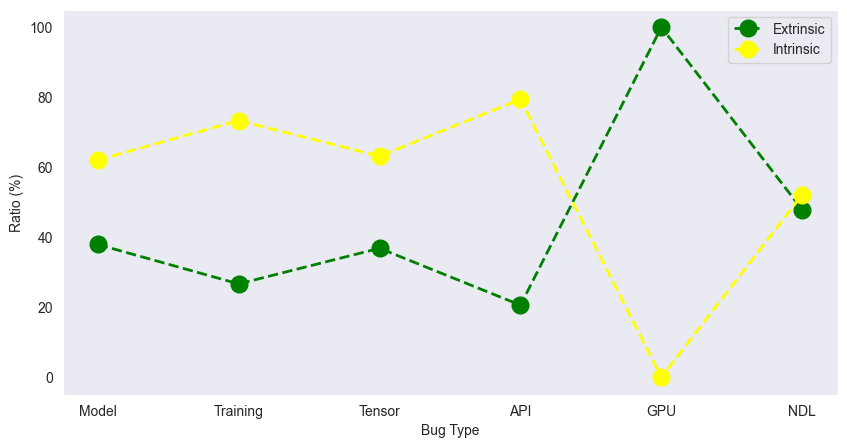

In [55]:
#line graph for Bug_Type and Ratio_Extrinsic_Intrinsic_Bug_Type
plt.figure(figsize=(10,5))
plt.plot(Bug_Type_Extrinsic,Ratio_Extrinsic_Bug_Type, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(Bug_Type_Intrinsic,Ratio_Intrinsic_Bug_Type, color='yellow', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.legend(['Extrinsic', 'Intrinsic'])
plt.xlabel('Bug Type')
plt.ylabel('Ratio (%)')
plt.grid()
plt.show()


In [56]:
#ratio of each unique values from DL_bug_type column with extrinsic bug column
groupby_val = df2.groupby('DL Bug Type')['Extrinsic Bug'].value_counts()

In [57]:
groupby_val_count = 18, 11, 55, 20, 12, 7, 27, 7, 0, 14, 48, 44

In [58]:
list_dl_bug_type_label

['NDL Bug', 'Model', 'Training', 'Tensor & Input', 'API', 'GPU']

In [59]:
list_dl_bug_type_ratio

[35.11450381679389,
 11.068702290076336,
 28.62595419847328,
 7.251908396946565,
 12.977099236641221,
 5.343511450381679]

In [61]:
Bug_Type_Extrinsic = ['NDL Bug', 'Model', 'Training', 'Tensor & Input', 'API', 'GPU']
Ratio_Extrinsic_Bug_Type = [NDL_Extrinsic[0], Model_Extrinsic[0], Training_Extrinsic[0], Tensor_Extrinsic[0], API_Extrinsic[0], GPU_Extrinsic[0]]
Ratio_Extrinsic_Bug_Type = [i*100 for i in Ratio_Extrinsic_Bug_Type]
Ratio_Extrinsic_Bug_Type

[47.82608695652174,
 37.93103448275862,
 26.666666666666668,
 36.84210526315789,
 20.588235294117645,
 100.0]

In [75]:
Bug_Type_Intrinsic = ['NDL Bug', 'Model', 'Training', 'Tensor & Input', 'API', 'GPU']
Ratio_Intrinsic_Bug_Type = [NDL_Intrinsic[0], Model_Intrinsic[0], Training_Intrinsic[0], Tensor_Intrinsic[0], API_Intrinsic[0], GPU_Intrinsic[0]]
Ratio_Intrinsic_Bug_Type = [i*100 for i in Ratio_Intrinsic_Bug_Type]
Ratio_Intrinsic_Bug_Type

[52.17391304347826,
 62.06896551724138,
 73.33333333333333,
 63.1578947368421,
 79.41176470588235,
 0.0]

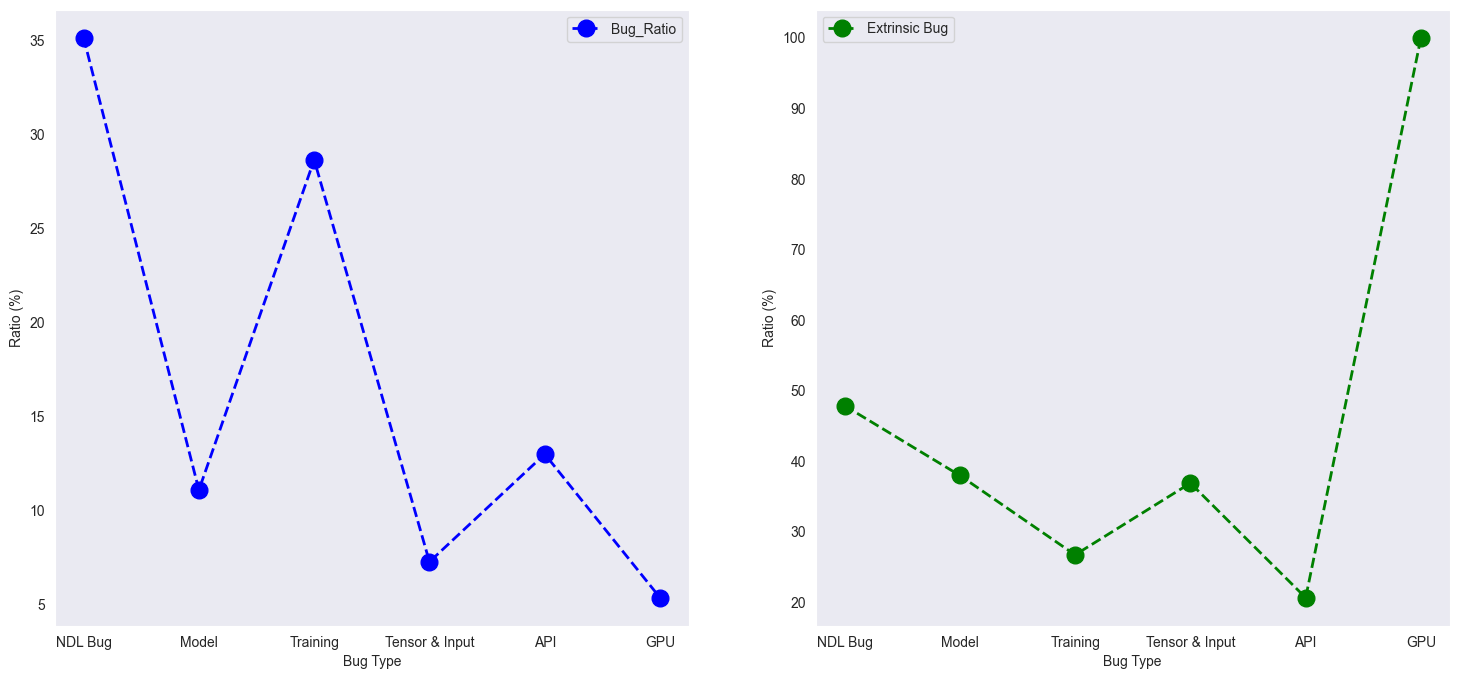

<Figure size 640x480 with 0 Axes>

In [66]:
#visualize using line graph with customization of the graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
ax1.plot(list_dl_bug_type_label,list_dl_bug_type_ratio,color='blue',marker='o',linestyle='dashed',linewidth=2,markersize=12)
ax1.legend(['Bug_Ratio'])
ax1.set_xlabel('Bug Type')
ax1.set_ylabel('Ratio (%)')
ax1.grid()

ax2.plot(Bug_Type_Extrinsic,Ratio_Extrinsic_Bug_Type, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
ax2.legend(['Extrinsic Bug'])
ax2.set_xlabel('Bug Type')
ax2.set_ylabel('Ratio (%)')
ax2.grid()

plt.show()
#save the graph as png and download with high resolution
plt.savefig('Bug_Ratio_Extrinsic_Bug_Type.png', dpi=300, bbox_inches='tight')


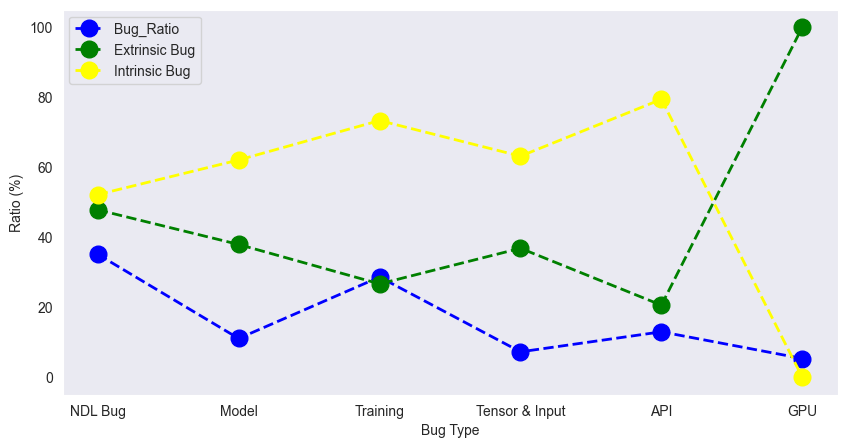

In [76]:
#concatenate three line graph in one graph
plt.figure(figsize=(10,5))
plt.plot(list_dl_bug_type_label,list_dl_bug_type_ratio,color='blue',marker='o',linestyle='dashed',linewidth=2,markersize=12)
plt.plot(Bug_Type_Extrinsic,Ratio_Extrinsic_Bug_Type, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(Bug_Type_Intrinsic,Ratio_Intrinsic_Bug_Type, color='yellow', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.legend(['Bug_Ratio', 'Extrinsic Bug', 'Intrinsic Bug'])
plt.xlabel('Bug Type')
plt.ylabel('Ratio (%)')
plt.grid()
plt.show()

In [120]:
#print one row where DL Bug is 1.0 and Extrinsic Bug is 1.0
df2.loc[(df2['DL_Bugs'] == 1.0) & (df2['Extrinsic Bug'] == 1.0)]

,User/Project,Bug/Issue ID,Summary,Commit ID,DL_Bugs,DL Bug Type,Non_DL_Bugs,Extrinsic Bug,Intrinsic Bug
0,apache+incubator-mxnet,10011,[CMake][IoT][Jetson] Building with CMake produ...,85215b6176ef3612d198f590268a6595b86565fb,1,4.0,0,1,0
3,apache+incubator-mxnet,10235,Build fails with USE_CUDNN = 0,11deb676bec595f05d3469a5b33724afd77e13e6,1,5.0,0,1,0
10,apache+incubator-mxnet,10901,Broken test_sparse_operator.test_sparse_mathem...,645b4c5265726efec86c07f03fd4d3f2afef1449,1,2.0,0,1,0
11,apache+incubator-mxnet,11057,Failed dist_sync_kvstore test not detected on ...,d52845372ddfa3275d0f589cd32944f3a64f7760,1,3.0,0,1,0
15,apache+incubator-mxnet,11160,mx.nd.zeros/ones don't recognize cpu_shared as...,3eada3b32aeab5c8cdf7d507bcc3a986c9e5b91f,1,5.0,0,1,0
17,apache+incubator-mxnet,11241,Conv1D throws CUDNN_STATUS_EXECUTION_FAILED,024b5a916dd3a39a39031ce5e6565cd7d9d60fe2,1,1.0,0,1,0
19,apache+incubator-mxnet,11331,gluon bug: AttributeError: '_thread._local' ob...,579e376edd461484a10bb93444e07e29df762208,1,2.0,0,1,0
22,apache+incubator-mxnet,10037,Example SSD prepare dataset tools are incompat...,b4161b00201bd9c372b738e7e168d01e209749a3,1,2.0,0,1,0
23,apache+incubator-mxnet,11339,compiling error when USE_CUDA=1 and USE_CUDNN...,5b631444974b72238a5d0a6929cf7a10ff532643,1,5.0,0,1,0
25,apache+incubator-mxnet,11353,Flaky test test_gluon_trainer.test_trainer_res...,619e4bded058e4bf77029bc30b395275d72f7907,1,2.0,0,1,0


In [121]:
#print one row where DL Bug is 1.0 and Extrinsic Bug is 0.0
df2.loc[(df2['DL_Bugs'] == 0.0) & (df2['Extrinsic Bug'] == 1.0)]

,User/Project,Bug/Issue ID,Summary,Commit ID,DL_Bugs,DL Bug Type,Non_DL_Bugs,Extrinsic Bug,Intrinsic Bug
1,apache+incubator-mxnet,10026,MXNET_MKLDNN_DEBUG=1 produces errors,525ead9caaf49035b0310ef7c8b686b393463760,0,420.0,1,1,0
6,apache+incubator-mxnet,10738,python build (with cython) seems broken in lin...,d0ff3cdca6a41e96fd0b894e815c9a853008589f,0,420.0,1,1,0
7,apache+incubator-mxnet,10858,make docs on Mac - scala docs failure,ea6ee0d217dcdac29fe0a22bdce019168a76a060,0,420.0,1,1,0
20,apache+incubator-mxnet,11108,Seems the gperftools-devel and jemalloc-devel ...,16a06b6c1dbfb92bd0ac68de6cfa32c53e544345,0,420.0,1,1,0
31,apache+incubator-mxnet,11841,All the tests in tools/coreml package are fail...,815f36ce8b4ed16fe27d500f5c8c930cd10cee5c,0,420.0,1,1,0
41,apache+incubator-mxnet,12524,AddVersion.py breaks the site output in a vari...,5078853650cfe45869b808f3198abc4735b96f25,0,420.0,1,1,0
42,apache+incubator-mxnet,12528,Those cases with some problems in dir : example,c0cd583cf92a3e47dd3b6c4bd67e64a3c12bf057,0,420.0,1,1,0
43,apache+incubator-mxnet,12613,Report a bug of Engine::Get(),d4e202a5d4152b540be970525f2bb91b62ebf148,0,420.0,1,1,0
50,apache+incubator-mxnet,13032,requests need upgrade due to security risk (CV...,de5267f43560f2f444cfa70e3e508ed79ae2acc5,0,420.0,1,1,0
52,apache+incubator-mxnet,13098,size_array operator returns wrong results on M...,636933d424d789661d9e954ebfb569e1a2945a78,0,420.0,1,1,0


In [124]:
#create a table with the value of the summary of row 3 and row 6
df2.loc[[3,6]].values

array([['apache+incubator-mxnet', 10235,
        'Build fails with USE_CUDNN = 0',
        '11deb676bec595f05d3469a5b33724afd77e13e6', 1, 5.0, 0, 1, 0],
       ['apache+incubator-mxnet', 10738,
        'python build (with cython) seems broken in linux (python3)',
        'd0ff3cdca6a41e96fd0b894e815c9a853008589f', 0, 420.0, 1, 1, 0]],
      dtype=object)

In [129]:
#search for the keyword 'does not support' in the column 'Summary'
df2[df2['Summary'].str.contains('version')]

,User/Project,Bug/Issue ID,Summary,Commit ID,DL_Bugs,DL Bug Type,Non_DL_Bugs,Extrinsic Bug,Intrinsic Bug
33,apache+incubator-mxnet,11961,1 inference outputs not matching across MXNet ...,25341648365598a9a123f033bf92ce7fb51c0a39,1,1.0,0,1,0
111,apache+incubator-mxnet,17061,Built from source uses old version of opencv,18c9a69e2f75c3f157149ec3344faef8ba12ff7f,1,4.0,0,1,0
184,pytorch+pytorch,21269,test_array_adaptor and test_from_cuda_array_in...,ee15ad1bd614186ce48b776f9bda570a758e20da,1,2.0,0,1,0
